My first data analytics project:
Clean Data, ab 2016 unvollstaendig

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


In [2]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
drop_row_index = df[df['Year'] > 2015].index
df = df.drop(drop_row_index)

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Which is the most-selled game?

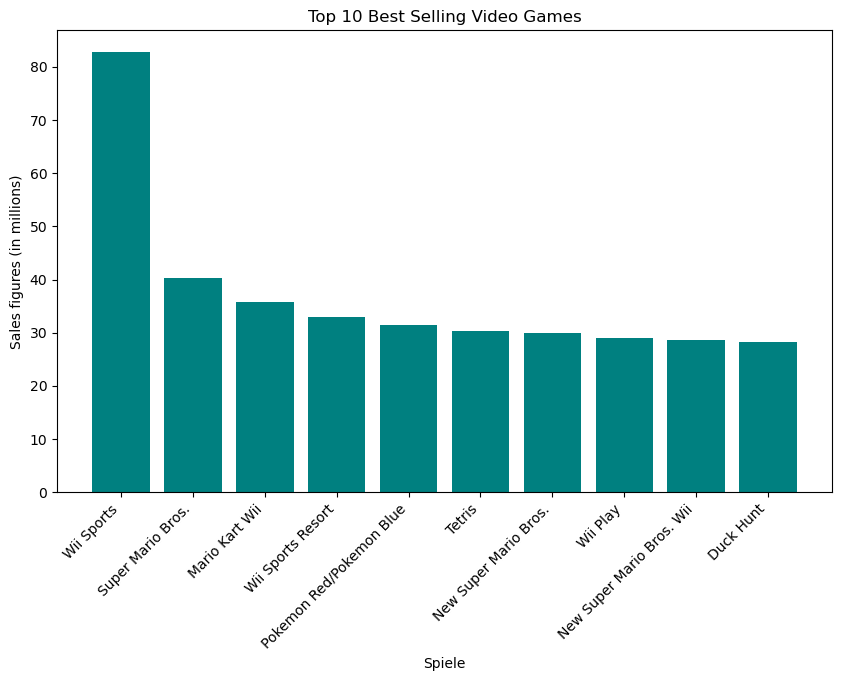

Best-selling video games:
   Rank                       Name  Global_Sales
0     1                 Wii Sports         82.74
1     2          Super Mario Bros.         40.24
2     3             Mario Kart Wii         35.82
3     4          Wii Sports Resort         33.00
4     5   Pokemon Red/Pokemon Blue         31.37
5     6                     Tetris         30.26
6     7      New Super Mario Bros.         30.01
7     8                   Wii Play         29.02
8     9  New Super Mario Bros. Wii         28.62
9    10                  Duck Hunt         28.31


In [5]:
# Nach den meistverkauften Spielen sortieren
top_games = df.sort_values(by='Global_Sales', ascending=False)

# Die Top 10 meistverkauften Spiele anzeigen
top_10_games = top_games.head(10)

plt.figure(figsize=(10, 6))  # Größe des Diagramms anpassen

plt.bar(top_10_games['Name'], top_10_games['Global_Sales'], color = 'teal')
plt.xlabel('Spiele')
plt.ylabel('Sales figures (in millions)')
plt.title('Top 10 Best Selling Video Games')

# Beschriftungen der x-Achse schräg stellen, um besser lesbar zu sein
plt.xticks(rotation=45, ha='right')

plt.show()
print('Best-selling video games:')
print(top_10_games[['Rank', 'Name', 'Global_Sales']])

# Which **genre** sells the most?

In [6]:
print("Which genre was developed the most?")
df['Genre'].value_counts()

Which genre was developed the most?


Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

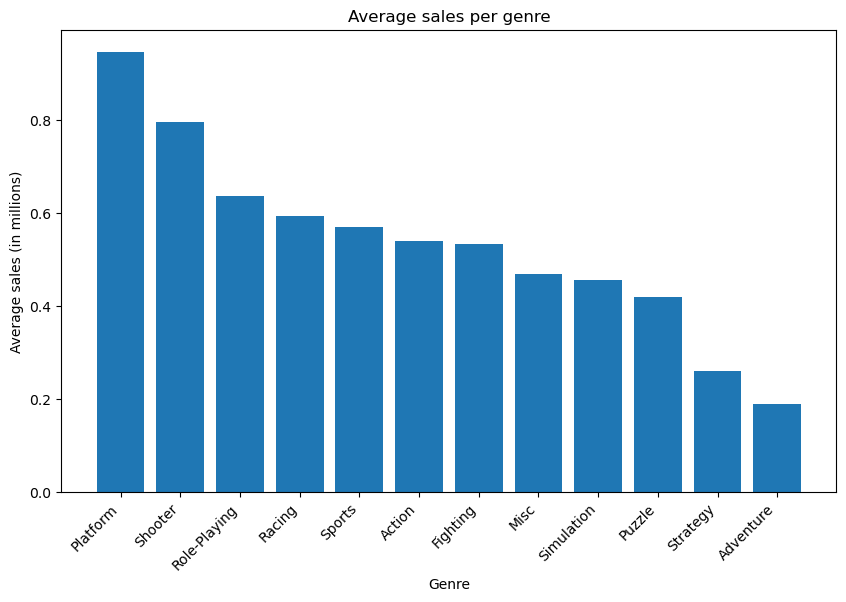

Top genres by average sales:
Genre
Platform        0.946689
Shooter         0.797457
Role-Playing    0.636632
Racing          0.594304
Sports          0.570334
Name: Global_Sales, dtype: float64


In [7]:
genre_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

# Balkendiagramm der durchschnittlichen Verkaufszahlen pro Genre erstellen
plt.figure(figsize=(10, 6))  # Größe des Diagramms anpassen

plt.bar(genre_sales.index, genre_sales)
plt.xlabel('Genre')
plt.ylabel('Average sales (in millions)')
plt.title('Average sales per genre')

# Beschriftungen der x-Achse schräg stellen, um besser lesbar zu sein
plt.xticks(rotation=45, ha='right')

plt.show()

# Die besten Genres basierend auf den durchschnittlichen Verkaufszahlen anzeigen
top_genres = genre_sales.head(5)  # Top 5 Genres
print("Top genres by average sales:")
print(top_genres)

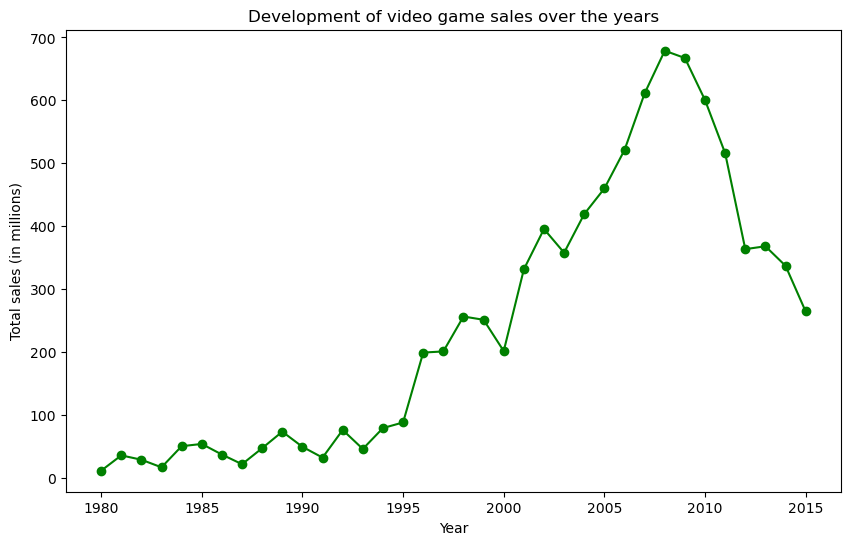

In [8]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Liniendiagramm der Gesamtverkaufszahlen pro Jahr erstellen
plt.figure(figsize=(10, 6))  # Größe des Diagramms anpassen

plt.plot(yearly_sales.index, yearly_sales, marker='o', linestyle='-', color = 'green')
plt.xlabel('Year')
plt.ylabel('Total sales (in millions)')
plt.title('Development of video game sales over the years')

plt.show()

In [9]:
games_2008_count = df['Year'].value_counts().loc[2008]

# Anzahl der Spiele im Jahr 2019 ausgeben
print("Anzahl der Spiele im Jahr 2008:", games_2008_count)

Anzahl der Spiele im Jahr 2008: 1428


# What are the most popular **game**, **genre**, **publisher**, and **platform** of all time?

In [10]:
regionals = ['NA_Sales', 'EU_Sales', 'JP_Sales']
aspects = ['Platform', 'Genre', 'Publisher']
for i in regionals:
    for j in aspects:
        k = df.groupby(j)[i].sum().sort_values(ascending=False).head(1)
        display(k)

Platform
X360    600.69
Name: NA_Sales, dtype: float64

Genre
Action    871.96
Name: NA_Sales, dtype: float64

Publisher
Nintendo    815.71
Name: NA_Sales, dtype: float64

Platform
PS3    342.91
Name: EU_Sales, dtype: float64

Genre
Action    518.64
Name: EU_Sales, dtype: float64

Publisher
Nintendo    417.81
Name: EU_Sales, dtype: float64

Platform
DS    175.57
Name: JP_Sales, dtype: float64

Genre
Role-Playing    348.64
Name: JP_Sales, dtype: float64

Publisher
Nintendo    454.25
Name: JP_Sales, dtype: float64

# **Conclusion**

Analyzing the dataset on the best-selling games allows us to spot trends and patterns in the gaming market. By examining the most common genres and platforms among the best-selling games, we can gain insight into player preferences and the types of games that tend to do well commercially. The dataset shows that action-adventure games and sports-based games are consistently among the top-selling genres, indicating strong demand for these types of games.